In [1]:
import pandas as pd 
!pip install chardet
!python -m pip install -U pycld3
import chardet
import matplotlib.pyplot as plt 
import cld3

In [2]:
DATASET_COLUMNS =['target','ids','date','flag','user','text']
dataset_encoding = "ISO-8859-1"
df=pd.read_csv('/home/suyash/Desktop/Tweets/dataset/tweets.csv',encoding=dataset_encoding,names=DATASET_COLUMNS)

In [3]:
df.head(10)

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [4]:
df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

In [5]:
df.isnull().sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

In [6]:
df.shape

(1600000, 6)

In [7]:
df.describe()

,target,ids
count,1.600000e+06,1.600000e+06
mean,2.000000e+00,1.998818e+09
std,2.000001e+00,1.935761e+08
min,0.000000e+00,1.467810e+09
25%,0.000000e+00,1.956916e+09
50%,2.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


In [8]:
df.nunique()

target          2
ids       1598315
date       774363
flag            1
user       659775
text      1581466
dtype: int64

In [9]:
df.target.value_counts()

0    800000
4    800000
Name: target, dtype: int64

In [10]:
shuffled = df.sample(frac=1, random_state=1).reset_index()

In [12]:
shuffled.head(10)

,index,target,ids,date,flag,user,text
0,514293,0,2190584004,Tue Jun 16 03:08:48 PDT 2009,NO_QUERY,Vicki_Gee,i miss nikki nu nu already shes always there ...
1,142282,0,1881451988,Fri May 22 04:42:15 PDT 2009,NO_QUERY,PatCashin,So I had a dream last night. I remember a sig...
2,403727,0,2058252964,Sat Jun 06 14:34:17 PDT 2009,NO_QUERY,deelectable,@girlyghost ohh poor sickly you (((hugs)) ho...
3,649503,0,2237307600,Fri Jun 19 05:34:22 PDT 2009,NO_QUERY,justinekepa,it is raining again
4,610789,0,2224301193,Thu Jun 18 09:20:06 PDT 2009,NO_QUERY,cmatt007,@MissKeriBaby wish I was in LA right now
5,67315,0,1692257495,Sun May 03 19:36:35 PDT 2009,NO_QUERY,Dogbook,Nala Olowalu still has a full tummy from bread...
6,833521,4,1557782222,Sun Apr 19 05:58:52 PDT 2009,NO_QUERY,MyAppleStuff,@macintom site doesn't seem to want to load up...
7,256032,0,1984628467,Sun May 31 15:29:11 PDT 2009,NO_QUERY,AlexCarrier,time for some sleep- hav to actually do some w...
8,657012,0,2240793149,Fri Jun 19 10:10:09 PDT 2009,NO_QUERY,simonhowes,@supercoolkp In Oxford that month.
9,980587,4,1834037031,Mon May 18 01:23:05 PDT 2009,NO_QUERY,Sofuce,"..time for a cup of tea and fruit bagels, i'm ..."


In [16]:
df_sample=shuffled.head(20000)

In [17]:
df_sample.target.value_counts()

4    10049
0     9951
Name: target, dtype: int64

In [19]:
df_sample.to_csv('sample.csv')

# Basic preprocessing 

In [13]:
import re 
import nltk 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/suyash/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# There is the possibility that tweets are in different languages lets explore that possibility 


In [17]:
cld3.get_language("影響包含對氣候的變化以及自然資源的枯竭程度")[0]
#cld3 is the pythn library trained over 100 languages .

'zh'

In [21]:
lang=[]
count=0
for i in range(len(df)):
    lang.append(cld3.get_language(df.text[i])[0])


In [24]:
unique_lang=set(lang)
len(unique_lang)

95

In [53]:
lang_df=pd.DataFrame(lang,columns=['language'])

In [64]:
lang_count=lang_df.value_counts()


<AxesSubplot:xlabel='0'>

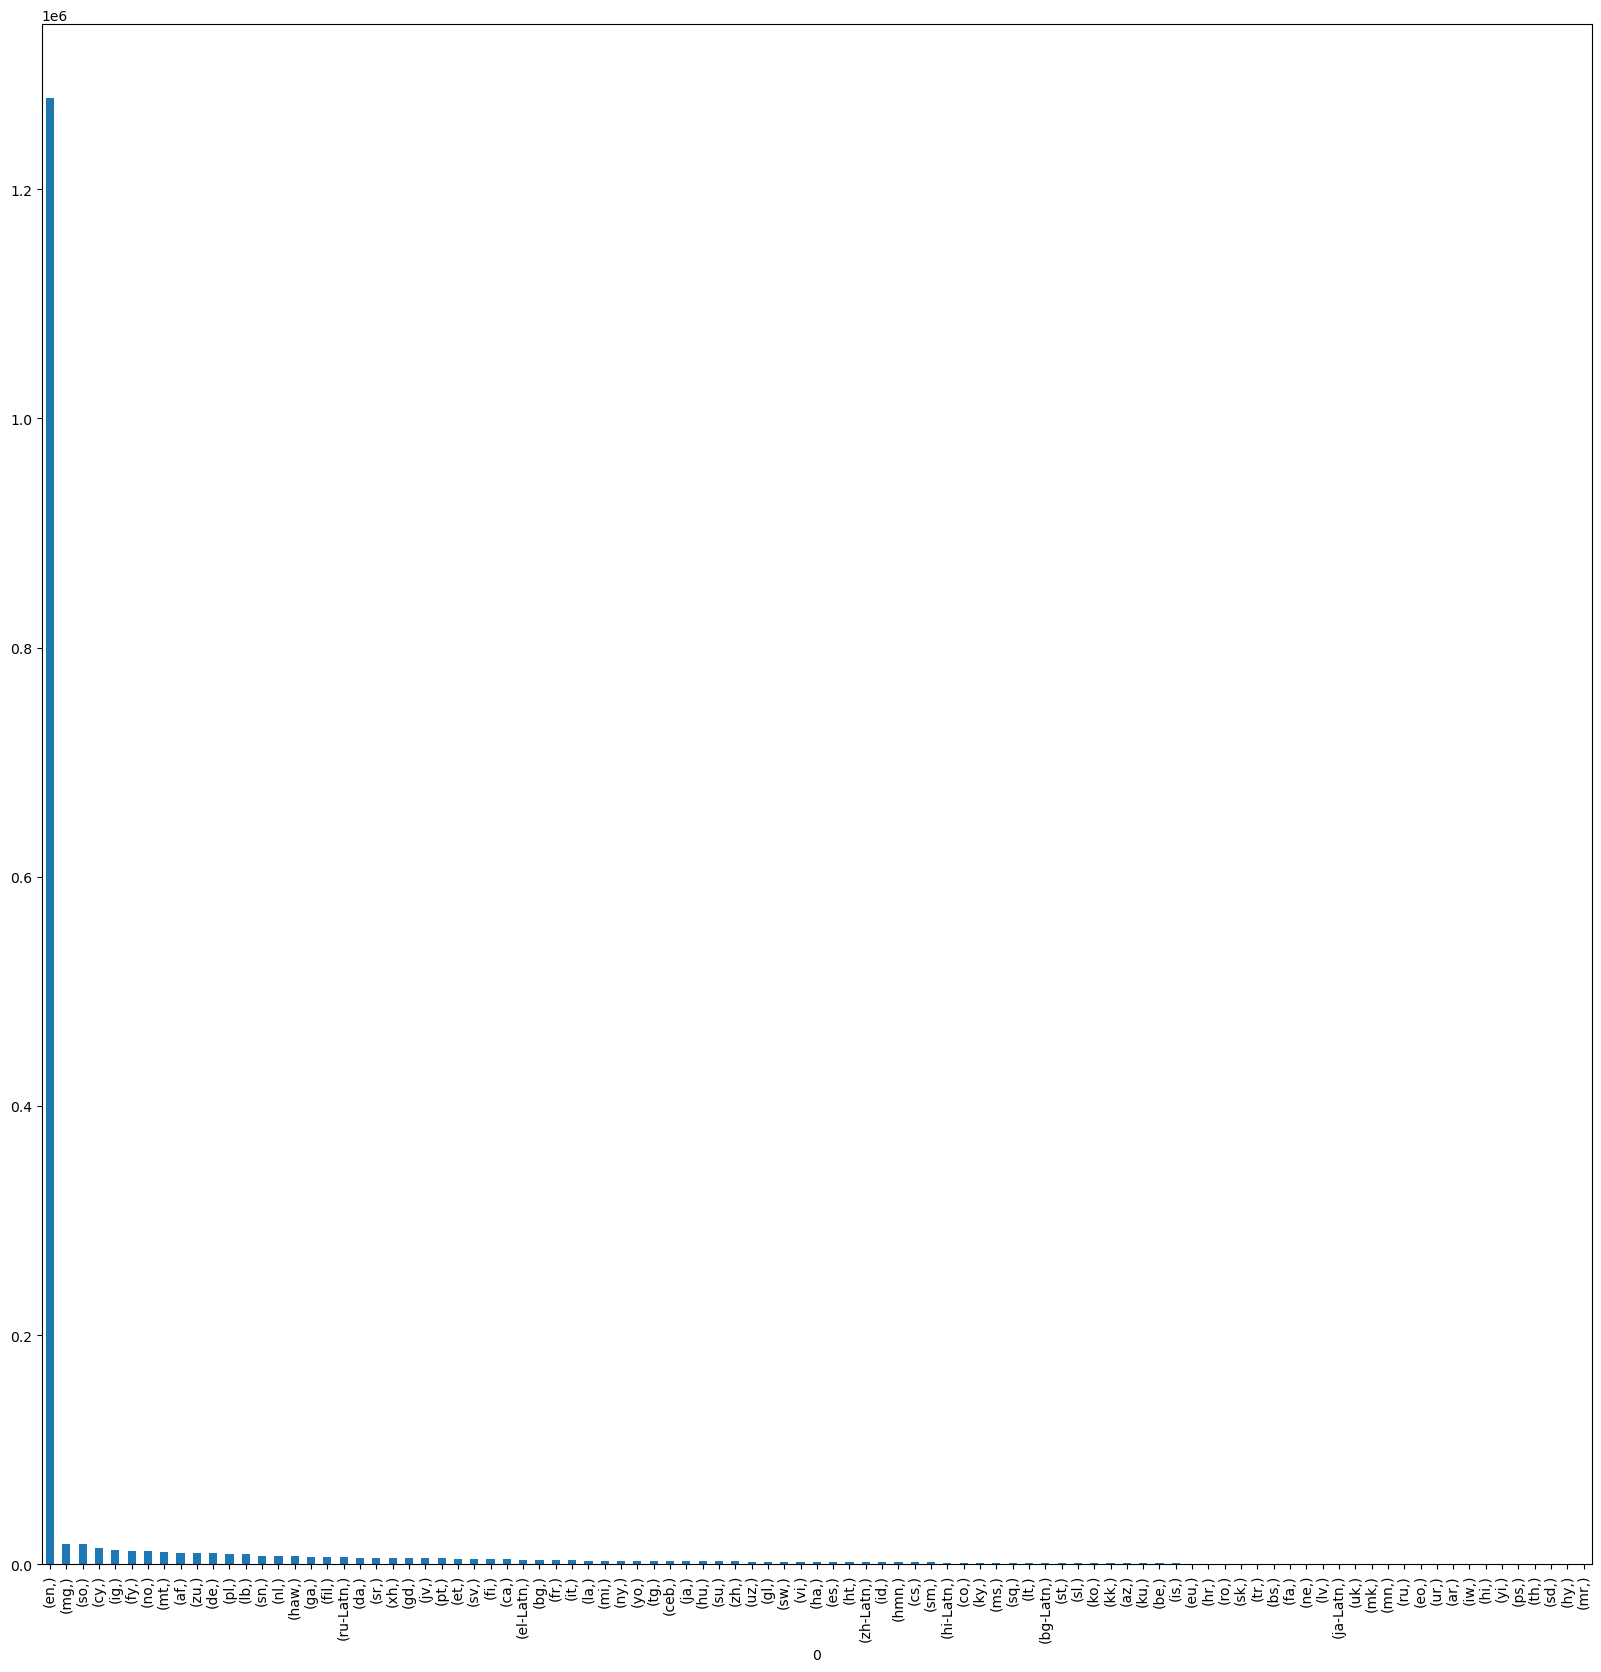

In [37]:
lang_count.plot.bar(figsize=(20,20), fontsize=10)

In [57]:
#Percenmtage of language that are english 
print("Percent of data in English (estimated):")
print((sum(lang_df.language=='en')/len(lang_df))*100)

Percent of data in English (estimated):
80.0036875


In the tweet dataset there are 95 diferent languages but the according to the above distribution the number of english language is higher than any other languges more than 80% of the dataset contains tweet in english language so some of the approsches we can try is:- 
 1> we drop the languages which are not english in this scenerio we will loose 20% of our dataset i..e more than 320000 . 
 2> we drop the languages which are less than 10000 in number because 10000 datapoints. but in this case if we have different language it would be very difficult to encode the data . or to tokenize the data . this can be solved by taking seperate languages on at a time and then preprocess it . 

In [65]:
#droping the tweets which are not in en english 
df_new=df.copy()


In [66]:
df_new['languages']=lang_df

In [67]:
df_new 

,target,ids,date,flag,user,text,languages
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",en
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,en
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,en
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,en
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",en
...,...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...,fy
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...,mt
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...,en
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...,en


In [76]:
df_new.text[9]

'@twittera que me muera ? '

In [77]:
df_new.languages[9]

'de'

In [78]:
df_new.text[1599997]

'Are you ready for your MoJo Makeover? Ask me for details '

In [75]:
# bhenchod galat detect kiya hai language pehle preprocessing karlo phir karo language detection kisi reliabale abi se 
# remove @ and links and all other patterns which can lead to wrong language detection 

